rerun on 2021-12-07 after correcting for salinity of media samples

This calculates the linear regression of genes versus O2 consumption

In [9]:

#read input data files
file_dir <- "/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/O2_consumption/"
fname <- "All_GoM_RNA_seq_transcripts_per_cell_by_genus_and_function_stacked_weighted_avg_O2_consumed_ALL_genes_10SAG_genera_no2017.csv"
big_data <- read.csv(file=paste(file_dir,fname,sep=""), header=TRUE)


In [10]:
#remove any transcript/cell values that are zero
keep <- (big_data$transcripts_per_cell > 0)
big_data <- big_data[keep,]



In [11]:
#get unique genes and create storage space for results
genes_unique <- unique(big_data$ko)
gene_cor <- data.frame(matrix(NA, ncol=10, nrow=length(genes_unique)))



In [12]:
#for each gene find correlation 'tween O2 and transcripts per cell
for (i in 1:length(genes_unique)){
  #extract info for a single gene
  this_gene <- genes_unique[i]
  keep1 <- (big_data$ko == this_gene)
  gene_data <- big_data[keep1,]
  x <- gene_data$transcripts_per_cell
  y <- gene_data$Weighted_avg_O2_consumed_per_cell
  #do regression only if 2 or more points for correlation
  if(length(x) >= 2){
    df <- data.frame(y,x)
    regression_model <- lm(y~., data=df)
    #store results
    gene_cor[i,1] <- as.character(this_gene)
    gene_cor[i,2] <- as.character(gene_data$ko[1])
    gene_cor[i,3] <- regression_model$coefficients[2]
    gene_cor[i,4] <- nrow(df)
    
    #add quality metrics of the fit
    if(nrow(df) >= 3){
      #print(gene_data)
      y <- regression_model$model[,1]
      y_residual <- regression_model$residuals
      N <- length(y)
      model_summary <- summary(regression_model)
      if(!is.na(coef(regression_model)[2])){
        pvalue_F <- pf(model_summary$fstatistic[1], 
                       model_summary$fstatistic[2],
                       model_summary$fstatistic[3],
                       lower.tail=FALSE)
        Quality_metrics <- data.frame(model_summary$r.squared, 
                                      model_summary$adj.r.squared,
                                      model_summary$fstatistic[1], 
                                      pvalue_F)
        gene_cor[i,5:6] <- confint(regression_model)[2,]
        gene_cor[i,7:10] <- Quality_metrics[1:4]}
      #print(gene_cor)
    }
  }
}



Warning message in summary.lm(regression_model):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(object):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(regression_model):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(object):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(regression_model):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(object):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(regression_model):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(object):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(regression_model):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(object):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(

In [13]:
#keep and print only those for which a correlation was found
keep <- !is.na(gene_cor[,3])
gene_cor <- gene_cor[keep,]
colnames(gene_cor) <- c("gene", "ko","Correlation", "N", "LCL","UCL",
                        "R sq", "Rsq adj", "F statistic", "p value")
gene_cor <- gene_cor[order(-gene_cor$Correlation),]
cat("\n\nStrongly Positively Correlated\n")
print(gene_cor[1:20,])
cat("\n\nStrongly Negatively Correlated\n")
last_row <- nrow(gene_cor)
print(gene_cor[(last_row-20):last_row,])





Strongly Positively Correlated
       gene     ko Correlation N         LCL       UCL      R sq     Rsq adj
3403 K01668 K01668  3197.66237 2          NA        NA        NA          NA
3683 K14056 K14056  1940.99205 2          NA        NA        NA          NA
3390 K12453 K12453  1105.25543 2          NA        NA        NA          NA
2695 K08990 K08990   538.95857 2          NA        NA        NA          NA
3495 K12253 K12253   412.85517 2          NA        NA        NA          NA
275  K02567 K02567   376.17735 2          NA        NA        NA          NA
2954 K06922 K06922   297.04393 3 -1141.56796 1735.6558 0.8731468  0.74629357
883  K03919 K03919   270.82524 3   -13.40065  555.0511 0.9932241  0.98644828
3512 K12409 K12409   198.68356 4  -586.43264  983.7998 0.3721696  0.05825442
3407 K09798 K09798   172.73277 3 -1376.02471 1721.4902 0.6675791  0.33515811
1044 K16784 K16784    81.61439 3 -2324.97572 2488.2045 0.1566008 -0.68679833
3636 K07746 K07746    79.08780 2          N

In [14]:
#keep and print only those whose slope is statistically significant
keep <- gene_cor[,4]*gene_cor[,5] >= 0 & !is.na(gene_cor[,4]) & !is.na(gene_cor[,5])
sig_cor <- gene_cor[keep,]
cat("\n\nTop 20 correlated\n")
print(sig_cor[1:20,])
cat("\n\nBottom 20 correlated\n")
last_row <- nrow(sig_cor)
print(sig_cor[(last_row-20):last_row,])




Top 20 correlated
       gene     ko Correlation  N        LCL       UCL      R sq   Rsq adj
2936 K19810 K19810   77.414323  5 13.3748210 141.45383 0.8314630 0.7752840
1088 K22310 K22310   64.511186  4  7.8624037 121.15997 0.9231015 0.8846522
908  K05770 K05770   39.793881 15 24.2050498  55.38271 0.7005515 0.6775170
2723 K22042 K22042   38.921481  7  0.1706216  77.67234 0.5714117 0.4856941
1071 K18981 K18981   33.965520 11  6.4716794  61.45936 0.4646045 0.4051161
544  K17486 K17486   32.714807  8 12.3761822  53.05343 0.7208146 0.6742837
931  K06918 K06918   28.009442  4  9.8002390  46.21865 0.9563343 0.9345015
2846 K19337 K19337   21.657432 12  6.8771013  36.43776 0.5159573 0.4675531
915  K05973 K05973   18.480347  3 11.6237258  25.33697 0.9991481 0.9982962
1061 K17317 K17317   18.334211 10  7.2353302  29.43309 0.6446123 0.6001889
739  K02016 K02016   17.642871 12  4.6375783  30.64816 0.4774401 0.4251841
591  K23537 K23537   16.951679 15  3.2474565  30.65590 0.3545574 0.3049080
1015 

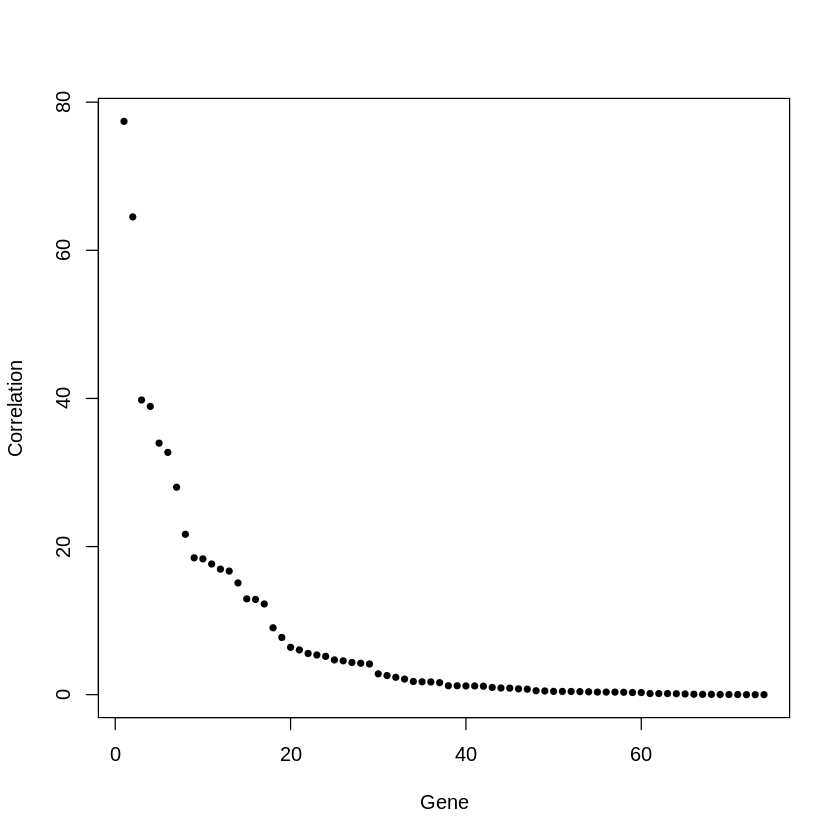

In [15]:

#add a plot of the significant correlations
plot(x=1:last_row,y=sig_cor[,3], pch=20, xlab="Gene",ylab="Correlation")

#write results to a *.csv file
write.csv(x=sig_cor, file="/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/O2_consumption/Linear_regression/Gene TCP O2 significant correlations ver 2.csv", row.names=FALSE)


In [16]:

#the following lines added to check function name was correct in subset data
top_20 <- sig_cor[1:20,]
for (i20 in 1:20){
  print(paste(i20, big_data$prokka_function[big_data$prokka_gene == top_20$Gene[i20]][1] == top_20$Function[i20]))
}
bot_20 <- sig_cor[(last_row-20):last_row,,]
for (i20 in 1:20){
  print(paste(i20, big_data$prokka_function[big_data$prokka_gene == bot_20$Gene[i20]][1] == bot_20$Function[i20]))
}



[1] "1 "
[1] "2 "
[1] "3 "
[1] "4 "
[1] "5 "
[1] "6 "
[1] "7 "
[1] "8 "
[1] "9 "
[1] "10 "
[1] "11 "
[1] "12 "
[1] "13 "
[1] "14 "
[1] "15 "
[1] "16 "
[1] "17 "
[1] "18 "
[1] "19 "
[1] "20 "
[1] "1 "
[1] "2 "
[1] "3 "
[1] "4 "
[1] "5 "
[1] "6 "
[1] "7 "
[1] "8 "
[1] "9 "
[1] "10 "
[1] "11 "
[1] "12 "
[1] "13 "
[1] "14 "
[1] "15 "
[1] "16 "
[1] "17 "
[1] "18 "
[1] "19 "
[1] "20 "
